expectation:  27343.75
mean       :  27343.75
std        :  141.47826136018213
min ~ max  :  26820 ~ 28001


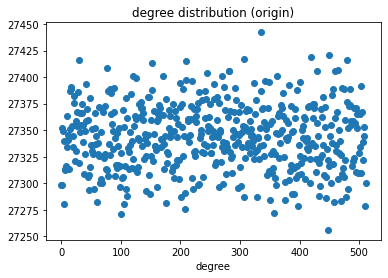

expectation:  27343.75
mean       :  27343.75
std        :  140.65249175716724
min ~ max  :  26771 ~ 27820


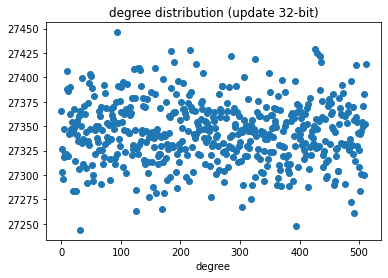

expectation:  27343.75
mean       :  27343.75
std        :  140.40814042795915
min ~ max  :  26818 ~ 28006


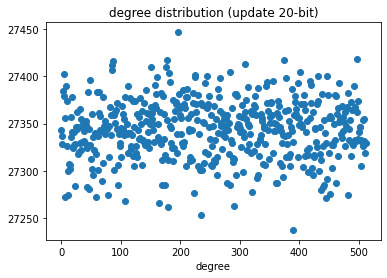

expectation:  25781.25
mean       :  25781.25
std        :  136.7826629182222
min ~ max  :  25290 ~ 26301


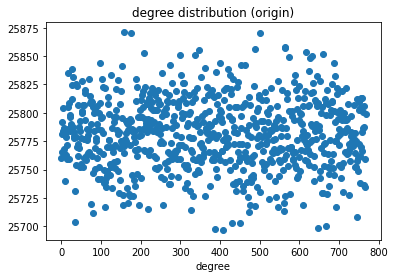

expectation:  25781.25
mean       :  25781.25
std        :  137.69593851808048
min ~ max  :  25269 ~ 26306


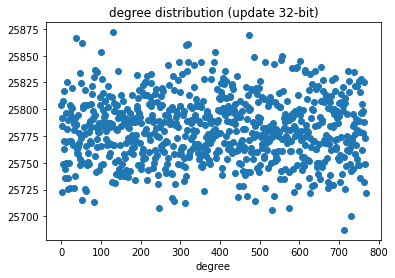

expectation:  25781.25
mean       :  25781.25
std        :  137.19263183264133
min ~ max  :  25252 ~ 26313


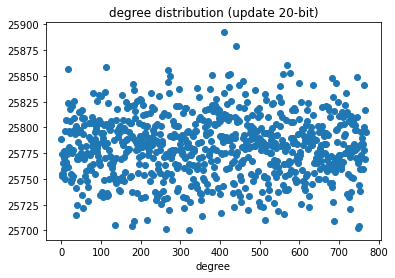

expectation:  13750.0
mean       :  13750.0
std        :  108.9476203704101
min ~ max  :  13327 ~ 14198


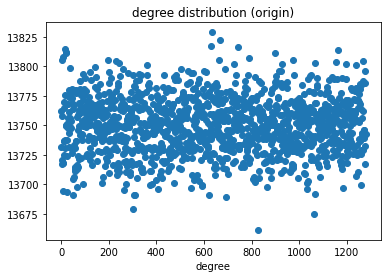

expectation:  13750.0
mean       :  13750.0
std        :  110.16949122545225
min ~ max  :  13270 ~ 14219


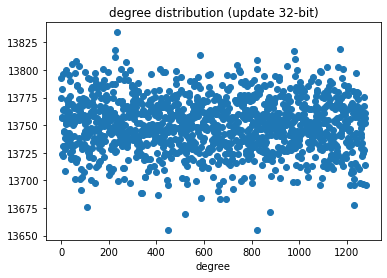

expectation:  13750.0
mean       :  13750.0
std        :  108.26868776336028
min ~ max  :  13296 ~ 14186


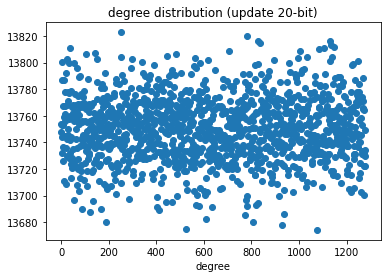

expectation:  7000000.0
mean       :  7000000.0
std        :  1572.276438798216
min ~ max  :  6995576 ~ 7004424


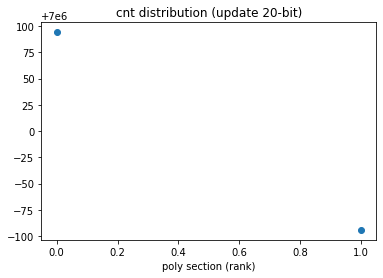

expectation:  7000000.0
mean       :  7000000.0
std        :  1131.272933469196
min ~ max  :  6997520 ~ 7002480


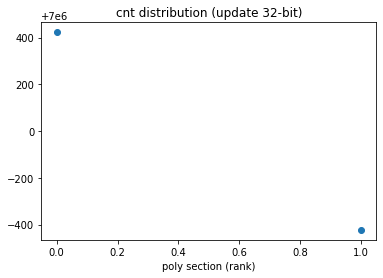

expectation:  7000000.0
mean       :  7000000.0
std        :  1246.6886339419318
min ~ max  :  6996652 ~ 7003348


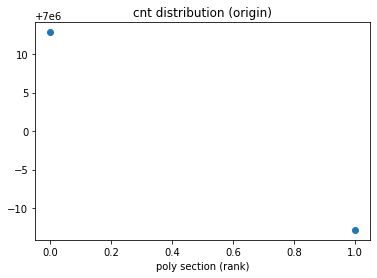

expectation:  6600000.0
mean       :  6600000.0
std        :  1603.329743585725
min ~ max  :  6595633 ~ 6603956


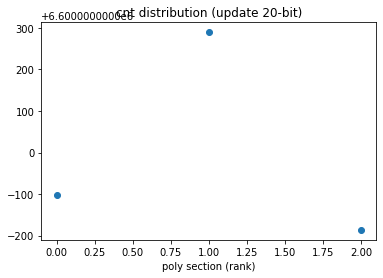

expectation:  6600000.0
mean       :  6600000.0
std        :  1832.6204644351942
min ~ max  :  6595354 ~ 6604262


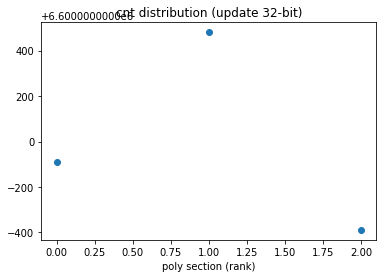

expectation:  6600000.0
mean       :  6600000.0
std        :  1646.9580545154554
min ~ max  :  6595839 ~ 6603680


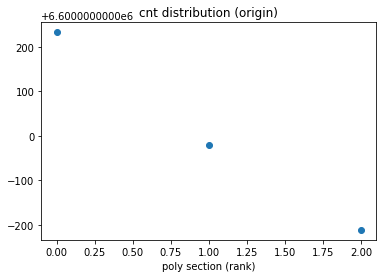

expectation:  3520000.0
mean       :  3520000.0
std        :  1981.4936790209551
min ~ max  :  3513971 ~ 3524929


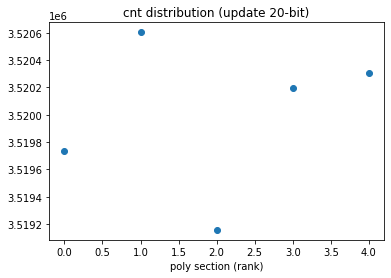

expectation:  3520000.0
mean       :  3520000.0
std        :  1688.6104583354918
min ~ max  :  3514861 ~ 3523834


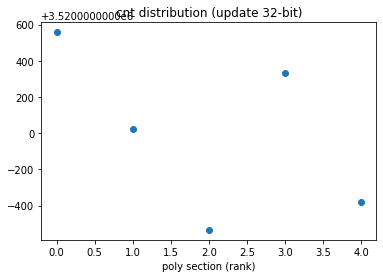

expectation:  3520000.0
mean       :  3520000.0
std        :  1493.7542836758662
min ~ max  :  3516736 ~ 3522983


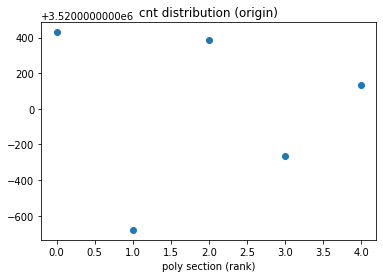

In [1]:
# --------------- total degree distribution --------------- #
# - after duplicate prevention
# - input is the set of count of the each coeff (degree)

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

NSAMPLE = 20
# path = "../build/bin/"
# path = "./sample/cnt-deg-0918-1/"
path = "./sample/cnt-deg-0918-2/"


def load_data(filepath):
    data = [0 for i in range(NSAMPLE)]
    with open(filepath, "r") as txt_file:
        meta_line = txt_file.readline()
        meta = [int(n) for n in meta_line.strip().split()]
        for i in range(NSAMPLE):
            data_line = txt_file.readline()
            data[i] = [int(n) for n in data_line.strip().split()]
    return meta, data


def dist_plot(data, idx, bin_num, x_label="idx", title="distribution", hist=False):
    if(hist):
        # sb.distplot(data, x= idx, kde = False)
        sb.histplot(data, x=idx, color='skyblue', alpha=0.7,
                    edgecolor='white', bins=bin_num)
    else:
        plt.scatter(range(len(data)), data, marker='o')
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()


def deg_dist_analysis(filepath, cnt=False, ver=""):
    data = [0 for i in range(NSAMPLE)]
    (meta, data) = load_data(filepath)

    hwt = meta[0]
    ntests = meta[1]
    dimension = meta[2]

    print("expectation: ", (hwt*ntests)/dimension)
    print("mean       : ", np.mean(data))
    print("std        : ", np.std(data))
    print("min ~ max  : ", np.min(data), "~", np.max(data))

    deg_dist = [0 for i in range(len(data[0]))]
    deg_idx = [int(i) for i in range(len(data[0]))]
    for i in range(NSAMPLE):
        deg_dist = np.array(deg_dist) + np.array(data[i])
    deg_dist = deg_dist/NSAMPLE

    if(cnt):
        dist_plot(deg_dist, deg_idx, dimension,
                  "poly section (rank)", "cnt distribution"+ver)
    else:
        dist_plot(deg_dist, deg_idx, dimension,
                  "degree", "degree distribution"+ver)


# hwt sampling version
v0 = " (origin)"
v1 = " (update 32-bit)"
v2 = " (update 20-bit)"

# SMAUG degree distribution
deg_dist_analysis(path+"smaug1-deg-dist-origin.txt", ver=v0)
deg_dist_analysis(path+"smaug1-deg-dist-update-32.txt", ver=v1)
deg_dist_analysis(path+"smaug1-deg-dist-update-20.txt", ver=v2)

deg_dist_analysis(path+"smaug3-deg-dist-origin.txt", ver=v0)
deg_dist_analysis(path+"smaug3-deg-dist-update-32.txt", ver=v1)
deg_dist_analysis(path+"smaug3-deg-dist-update-20.txt", ver=v2)

deg_dist_analysis(path+"smaug5-deg-dist-origin.txt", ver=v0)
deg_dist_analysis(path+"smaug5-deg-dist-update-32.txt", ver=v1)
deg_dist_analysis(path+"smaug5-deg-dist-update-20.txt", ver=v2)

# SMAUG count array distribution
deg_dist_analysis(path+"smaug1-deg-cnt-update-20.txt", cnt=True, ver=v2)
deg_dist_analysis(path+"smaug1-deg-cnt-update-32.txt", cnt=True, ver = v1)
deg_dist_analysis(path+"smaug1-deg-cnt-origin.txt", cnt=True, ver = v0)


deg_dist_analysis(path+"smaug3-deg-cnt-update-20.txt", cnt=True, ver=v2)
deg_dist_analysis(path+"smaug3-deg-cnt-update-32.txt", cnt=True, ver = v1)
deg_dist_analysis(path+"smaug3-deg-cnt-origin.txt", cnt=True, ver = v0)


deg_dist_analysis(path+"smaug5-deg-cnt-update-20.txt", cnt=True, ver=v2)
deg_dist_analysis(path+"smaug5-deg-cnt-update-32.txt", cnt=True, ver = v1)
deg_dist_analysis(path+"smaug5-deg-cnt-origin.txt", cnt=True, ver = v0)